In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.insert(0, "/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch")

# Introduction to PyTorch

This tutorial shows the basics of PyTorch library.

We design simple Neural Networks for classification task on MNIST dataset.

Necessary knowledge you can find in PyTorch documentation:

https://pytorch.org/docs/stable/index.html

and tutorials:

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [3]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


1. PyTorch is based on tensor operations.
Please create tensors in the following ways:
- directly with python list
- from `numpy`
- with random values (initialize generator with your academic id / student number from USOS system)
- linear space in range from -5 to 15 and number of elements.
- 3 tensors with indices of each element of grid for dimensions: 1, 2, 3 (without 0-th - basically is a batch dim)

For all cases use `shape = (1, 3, 28, 28)`.

For display use `print` function.

In [4]:
import torch

shape = (1, 3, 28, 28)

In [5]:
lst = [
    [
        [
            [
                x for x in range(shape[3])
            ] for _ in range(shape[2])
        ] for _ in range(shape[1])
    ] for _ in range(shape[0])
    ]
t1 = torch.tensor(lst)
print(t1)
print(t1.shape)

tensor([[[[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]]]])
torch.Size([1, 3, 28, 28])


In [6]:
import numpy as np

t2 = torch.tensor(np.array(lst))
print(t2)
print(t2.shape)

tensor([[[[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]]]])
torch.Size([1, 3, 28, 28])


In [7]:
gen = torch.Generator()
gen.manual_seed(401802)
t3 = torch.rand(shape, generator=gen)
print(t3)
print(t3.shape)

tensor([[[[0.6453, 0.2287, 0.4724,  ..., 0.2678, 0.2955, 0.4731],
          [0.2730, 0.0384, 0.0303,  ..., 0.7377, 0.5117, 0.1972],
          [0.7068, 0.6787, 0.9472,  ..., 0.8677, 0.2124, 0.3859],
          ...,
          [0.2690, 0.2431, 0.7328,  ..., 0.6926, 0.2133, 0.1222],
          [0.7872, 0.4325, 0.8115,  ..., 0.5331, 0.6813, 0.4586],
          [0.6141, 0.0350, 0.2233,  ..., 0.6925, 0.1176, 0.0934]],

         [[0.7880, 0.6926, 0.2405,  ..., 0.6460, 0.3366, 0.2797],
          [0.9582, 0.5104, 0.6337,  ..., 0.6905, 0.1257, 0.7467],
          [0.1009, 0.9521, 0.1382,  ..., 0.6071, 0.3786, 0.3313],
          ...,
          [0.1140, 0.1713, 0.3877,  ..., 0.7391, 0.6953, 0.2386],
          [0.8448, 0.4511, 0.2762,  ..., 0.7529, 0.6860, 0.6450],
          [0.2203, 0.5105, 0.7461,  ..., 0.0213, 0.9252, 0.7778]],

         [[0.0061, 0.8862, 0.7756,  ..., 0.0259, 0.8912, 0.5855],
          [0.9616, 0.2027, 0.6873,  ..., 0.6073, 0.6412, 0.7676],
          [0.4207, 0.2737, 0.0402,  ..., 0

In [8]:
vector = np.linspace(-5, 15, np.product(list(shape)))
vector.resize(shape)
t4 = torch.tensor(vector)
print(t4)
print(t4.shape)

tensor([[[[-5.0000, -4.9915, -4.9830,  ..., -4.7873, -4.7788, -4.7703],
          [-4.7618, -4.7533, -4.7448,  ..., -4.5491, -4.5406, -4.5321],
          [-4.5236, -4.5151, -4.5066,  ..., -4.3109, -4.3024, -4.2939],
          ...,
          [ 0.9549,  0.9634,  0.9719,  ...,  1.1676,  1.1761,  1.1846],
          [ 1.1931,  1.2016,  1.2101,  ...,  1.4058,  1.4143,  1.4228],
          [ 1.4313,  1.4398,  1.4483,  ...,  1.6440,  1.6525,  1.6610]],

         [[ 1.6695,  1.6780,  1.6865,  ...,  1.8822,  1.8907,  1.8992],
          [ 1.9077,  1.9162,  1.9247,  ...,  2.1204,  2.1289,  2.1374],
          [ 2.1459,  2.1544,  2.1629,  ...,  2.3586,  2.3671,  2.3756],
          ...,
          [ 7.6244,  7.6329,  7.6414,  ...,  7.8371,  7.8456,  7.8541],
          [ 7.8626,  7.8711,  7.8796,  ...,  8.0753,  8.0838,  8.0923],
          [ 8.1008,  8.1093,  8.1178,  ...,  8.3135,  8.3220,  8.3305]],

         [[ 8.3390,  8.3475,  8.3560,  ...,  8.5517,  8.5602,  8.5687],
          [ 8.5772,  8.5857,  

In [9]:
lst1 = [
    [
        [
            [
                x for _ in range(shape[3])
            ] for _ in range(shape[2])
        ] for x in range(shape[1])
    ] for _ in range(shape[0])
    ]
t51 = torch.tensor(lst1)
print(t51)
print(t51.shape)

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          ...,
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1]],

         [[2, 2, 2,  ..., 2, 2, 2],
          [2, 2, 2,  ..., 2, 2, 2],
          [2, 2, 2,  ..., 2, 2, 2],
          ...,
          [2, 2, 2,  ..., 2, 2, 2],
          [2, 2, 2,  ..., 2, 2, 2],
          [2, 2, 2,  ..., 2, 2, 2]]]])
torch.Size([1, 3, 28, 28])


In [10]:
lst2 = [
    [
        [
            [
                x for _ in range(shape[3])
            ] for x in range(shape[2])
        ] for _ in range(shape[1])
    ] for _ in range(shape[0])
    ]
t52 = torch.tensor(lst2)
print(t52)
print(t52.shape)

tensor([[[[ 0,  0,  0,  ...,  0,  0,  0],
          [ 1,  1,  1,  ...,  1,  1,  1],
          [ 2,  2,  2,  ...,  2,  2,  2],
          ...,
          [25, 25, 25,  ..., 25, 25, 25],
          [26, 26, 26,  ..., 26, 26, 26],
          [27, 27, 27,  ..., 27, 27, 27]],

         [[ 0,  0,  0,  ...,  0,  0,  0],
          [ 1,  1,  1,  ...,  1,  1,  1],
          [ 2,  2,  2,  ...,  2,  2,  2],
          ...,
          [25, 25, 25,  ..., 25, 25, 25],
          [26, 26, 26,  ..., 26, 26, 26],
          [27, 27, 27,  ..., 27, 27, 27]],

         [[ 0,  0,  0,  ...,  0,  0,  0],
          [ 1,  1,  1,  ...,  1,  1,  1],
          [ 2,  2,  2,  ...,  2,  2,  2],
          ...,
          [25, 25, 25,  ..., 25, 25, 25],
          [26, 26, 26,  ..., 26, 26, 26],
          [27, 27, 27,  ..., 27, 27, 27]]]])
torch.Size([1, 3, 28, 28])


In [11]:
lst3 = [
    [
        [
            [
                x for x in range(shape[3])
            ] for _ in range(shape[2])
        ] for _ in range(shape[1])
    ] for _ in range(shape[0])
    ]
t53 = torch.tensor(lst3)
print(t53)
print(t53.shape)

tensor([[[[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]]]])
torch.Size([1, 3, 28, 28])


2. PyTorch allow for applying GPU for computations.
Check is gpu (CUDA) is available, then use it as `device`, else use `'cpu'`.

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

3. To train a networks we need a dataset.

Please download `MINIST` dataset with `torchvision.dataset`.

For any kind of ML task, validation or testing is required.

So, create train and test datasets.

For train dataset apply also augmentation transforms, crop, translation and rotation.

You can try to apply different transforms.

For both apply ToTensor.

Next, pack datasets into `DataLoader`s with batch size of 64.
Use variables with names: `train_loader` and `test_loader`.

Next display sizes of datasets, shapes of elements and display few images and their labels.

Data batch shape =  (64, 1, 28, 28)
Label:  6


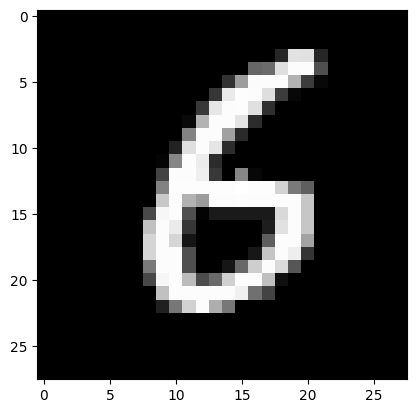

Label:  9


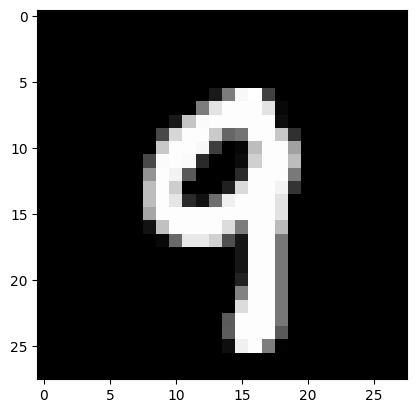

Label:  1


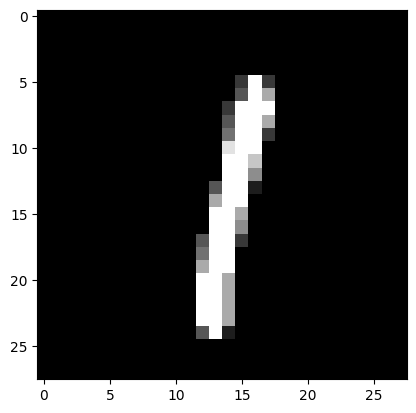

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


train_dataset = datasets.MNIST(root='/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data', train=True, download=True, transform=ToTensor())
test_dataset = datasets.MNIST(root='/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data', train=False, download=True, transform=ToTensor())

batchsize = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batchsize, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batchsize, shuffle=True)
for X, Y in train_loader:
    print("Data batch shape = ", np.shape(X.numpy()))
    for i in range(3):
      print("Label: ", Y.numpy()[i])
      plt.imshow(X[i].reshape(28,28), cmap="gray")
      plt.show()
    break

4. `*`Additionally, you can prepare analysis of datasets.

E.g. statistics like mean and variance of all elements, for each label.

Analysis can allow you for designing better network architecture.   

5. When we have datasets, so we can create model for classification task.

Please, define class `MLP` as Multi Layer Perceptron

with two hidden fully connected layers with bias.

Class must inherits from `torch.nn.Module`.

Apply following configuration:

- first with 512 neurons,
- second with 512 neurons,
- output layer adjust to size of classification problem.

For `__init__` method add parameters: input_shape and output_size.

Don't forget about nonlinearities!

For hidden layers you can use `ReLU` module from `torch.nn`.

For output apply softmax function.

Network layer-by-layer processing define in `forward` method with argument as a network

input tensor - batch of images with shape (batch_size, channels, height, width).
(channels = 1, for gray scale images)

Instantiate model as `net` object.


In [14]:
class MLP(torch.nn.Module):

    def __init__(self, input_shape=(1, 28, 28), output_shape=10) -> None:
        super().__init__()
        neurons_counts = [512, 512]
        self.CNN = torch.nn.Sequential(
            torch.nn.Linear(torch.prod(torch.tensor(input_shape)),
                            neurons_counts[0]),
            torch.nn.ReLU(),
            torch.nn.Linear(neurons_counts[0], neurons_counts[1]),
            torch.nn.ReLU(),
            torch.nn.Linear(neurons_counts[1], output_shape)
            )
        self.FC = torch.nn.Softmax(dim=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(x.size(0), -1)
        x = self.CNN(x)
        return self.FC(x)


net = MLP()
print(net)

MLP(
  (CNN): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
  (FC): Softmax(dim=1)
)


6. To train network we need to know 'how good or bad' results it gives.
Please, instantiate `torch.nn.CrossEntropyLoss` as `loss_fcn`.

In [15]:
loss_fcn = torch.nn.CrossEntropyLoss()

7. To score network define accuracy metric.
For network output you need to decide what is the final network answer.
(`argmax`).

`torch.no_grad()` prevents gradient requirement for computations inside method.

In [16]:
from abc import ABC, abstractmethod
from typing import Any


class BaseMetric(ABC):

    @abstractmethod
    def __call__(self, y_pred, y_ref) -> Any:
        raise NotImplementedError()


class AccuracyMetric(BaseMetric):

    def __init__(self) -> None:
        pass

    @torch.no_grad()
    def __call__(self, y_pred: torch.Tensor, y_ref: torch.Tensor) -> torch.Tensor:
        """
        :param y_pred: tensor of shape (batch_size, num_of_classes) type float
        :param y_ref: tensor with shape (batch_size,) and type Long
        :return: scalar tensor with accuracy metric for batch
        """
        # scalar value
        score: torch.Tensor = (y_pred.argmax(dim=1) == y_ref).sum() / len(y_ref)

        return score


metric = AccuracyMetric()

8. To change network parameters, we need optimizers object.
Instantiate `torch.optim.SGD` (with `net`work parameters) as `optimizer`.
Use learning rate = 0.001

In [17]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

9. Now define training / testing function:

In [18]:
from typing import Tuple
import tqdm


def train(model: torch.nn.Module,
          data_generator,
          criterion,
          metric: BaseMetric,
          mode: str = 'test',
          optimizer: torch.optim.Optimizer = None,
          update_period: int = None,
          device = torch.device('cpu')) -> Tuple[torch.nn.Module, float, float]:

    # change model mode to train or test
    if mode == 'train':
        model = model.train(True)

    elif mode == 'test':
        model = model.train(False)

    else:
        raise RuntimeError("Unsupported mode.")

    # move model to device
    model.to(device)
    # reset model parameters' gradients with optimizer
    if mode == 'train':
        optimizer.zero_grad()

    total_loss = 0.0
    total_accuracy = 0.0
    samples_num = 0

    for i, (X, y) in tqdm.tqdm(enumerate(data_generator)):
        # convert tensors to device
        X = X.to(device)
        y = y.to(device)

        # depending on mode use or not torch.no_grad() as 'with' block
        if mode == "train":
          # process by network
          y_pred = model(X)
        else:
          with torch.no_grad():
            y_pred = model(X)

        # calculate loss
        loss = criterion(y_pred, y)

        if mode == "train":
          # designate gradient based on loss
          loss.backward()

        if mode == 'train' and (i+1) % update_period == 0:
            # update parameters with optimizer
            optimizer.step()
            optimizer.zero_grad()

        # calculate accuracy
        accuracy = metric(y_pred, y)

        total_loss += loss.item() * y_pred.shape[0]
        total_accuracy += accuracy.item() * y_pred.shape[0]
        samples_num += y_pred.shape[0]

    if samples_num == 0:
        return model, 0.0, 0.0

    return model, total_loss / samples_num, total_accuracy / samples_num

10. Prepare training loop (over epochs) function:
- adjust max number of epochs to achieve satisfactory results.
- `**` additionally, implement auto-detection of bias-variance tradeoff point, to break further training.
- `***` additionally, use learning rate scheduler.
- for each epoch collect losses and accuracies for both datasets.

In [19]:
def training(model, train_loader, test_loader, loss_fcn, metric, optimizer,
             update_period, epoch_max,
             device):
    loss_train = []
    loss_test = []
    acc_train = []
    acc_test = []

    for e in range(epoch_max):
        epoch = e + 1
        print(f'Epoch {epoch}')
        print('TRAINING')
        net, loss, acc = train(model, train_loader, loss_fcn, metric, "train",
                               optimizer, update_period, device)
        loss_train.append(loss)
        acc_train.append(acc)

        print('VALIDATION')
        net, loss, acc = train(model, train_loader, loss_fcn, metric, "test",
                               optimizer, update_period, device)
        loss_test.append(loss)
        acc_test.append(acc)

        print(f"Training results: loss = {loss_train[-1]}, " \
              f"accuracy = {acc_train[-1]}")
        print(f"Test results: loss = {loss_test[-1]}, " \
              f"accuracy = {acc_test[-1]}")
        print("\n\n")
        if len(acc_train) >= 3 and acc_train[-1] <= acc_train[-3]:
            break

    return model, {'loss_train': loss_train, 'acc_train': acc_train,
                   'loss_test': loss_test, 'acc_test': acc_test}

11. Display training history.

In [20]:
training(net, train_loader, test_loader, loss_fcn, metric, optimizer, update_period=2, epoch_max=20, device=device)

Epoch 1
TRAINING


938it [00:31, 29.55it/s]


VALIDATION


938it [00:12, 73.68it/s]


Training results: loss = 2.30230929590861, accuracy = 0.10585
Test results: loss = 2.3020618839263918, accuracy = 0.11756666666666667



Epoch 2
TRAINING


938it [00:15, 59.18it/s]


VALIDATION


938it [00:12, 73.68it/s]


Training results: loss = 2.30181466700236, accuracy = 0.12991666666666668
Test results: loss = 2.3015637430826823, accuracy = 0.14355



Epoch 3
TRAINING


938it [00:16, 58.09it/s]


VALIDATION


938it [00:12, 73.26it/s]


Training results: loss = 2.3013119517008462, accuracy = 0.15701666666666667
Test results: loss = 2.3010558550516764, accuracy = 0.17171666666666666



Epoch 4
TRAINING


938it [00:16, 58.37it/s]


VALIDATION


938it [00:13, 67.80it/s]


Training results: loss = 2.300797890853882, accuracy = 0.18713333333333335
Test results: loss = 2.3005350112915037, accuracy = 0.2038



Epoch 5
TRAINING


938it [00:17, 54.87it/s]


VALIDATION


938it [00:12, 73.12it/s]


Training results: loss = 2.300269059753418, accuracy = 0.22153333333333333
Test results: loss = 2.2999975129445396, accuracy = 0.23911666666666667



Epoch 6
TRAINING


938it [00:15, 59.45it/s]


VALIDATION


938it [00:12, 73.00it/s]


Training results: loss = 2.299721854019165, accuracy = 0.25843333333333335
Test results: loss = 2.299439925003052, accuracy = 0.2772833333333333



Epoch 7
TRAINING


938it [00:15, 59.25it/s]


VALIDATION


938it [00:13, 68.98it/s]


Training results: loss = 2.299152458445231, accuracy = 0.297
Test results: loss = 2.2988578550974528, accuracy = 0.3154666666666667



Epoch 8
TRAINING


938it [00:16, 58.49it/s]


VALIDATION


938it [00:12, 72.76it/s]


Training results: loss = 2.298556451288859, accuracy = 0.3367
Test results: loss = 2.298247018432617, accuracy = 0.3552



Epoch 9
TRAINING


938it [00:16, 55.63it/s]


VALIDATION


938it [00:12, 73.85it/s]


Training results: loss = 2.2979292082468668, accuracy = 0.3722666666666667
Test results: loss = 2.2976023699442547, accuracy = 0.38963333333333333



Epoch 10
TRAINING


938it [00:17, 52.34it/s]


VALIDATION


938it [00:12, 73.55it/s]


Training results: loss = 2.297265315246582, accuracy = 0.40513333333333335
Test results: loss = 2.2969180749257405, accuracy = 0.41815



Epoch 11
TRAINING


938it [00:17, 54.12it/s]


VALIDATION


938it [00:12, 75.78it/s]


Training results: loss = 2.2965586561838784, accuracy = 0.42998333333333333
Test results: loss = 2.2961875583648683, accuracy = 0.4419166666666667



Epoch 12
TRAINING


938it [00:17, 55.02it/s]


VALIDATION


938it [00:12, 74.08it/s]


Training results: loss = 2.295802048365275, accuracy = 0.45225
Test results: loss = 2.2954033824920654, accuracy = 0.4623833333333333



Epoch 13
TRAINING


938it [00:16, 56.18it/s]


VALIDATION


938it [00:12, 72.84it/s]


Training results: loss = 2.294987242635091, accuracy = 0.47063333333333335
Test results: loss = 2.2945559122721355, accuracy = 0.47873333333333334



Epoch 14
TRAINING


938it [00:16, 56.80it/s]


VALIDATION


938it [00:13, 71.90it/s]


Training results: loss = 2.2941036347707113, accuracy = 0.4849
Test results: loss = 2.2936338523864745, accuracy = 0.49215



Epoch 15
TRAINING


938it [00:16, 58.51it/s]


VALIDATION


938it [00:14, 64.67it/s]


Training results: loss = 2.2931387360890705, accuracy = 0.4975333333333333
Test results: loss = 2.292623133468628, accuracy = 0.5016833333333334



Epoch 16
TRAINING


938it [00:16, 57.08it/s]


VALIDATION


938it [00:12, 72.38it/s]


Training results: loss = 2.292076560592651, accuracy = 0.5052666666666666
Test results: loss = 2.2915057445526124, accuracy = 0.5079833333333333



Epoch 17
TRAINING


938it [00:16, 57.19it/s]


VALIDATION


938it [00:13, 71.29it/s]


Training results: loss = 2.2908963368733724, accuracy = 0.5095666666666666
Test results: loss = 2.2902577629089356, accuracy = 0.5099833333333333



Epoch 18
TRAINING


938it [00:15, 58.89it/s]


VALIDATION


938it [00:12, 73.24it/s]


Training results: loss = 2.2895702344258626, accuracy = 0.5088166666666667
Test results: loss = 2.288846657816569, accuracy = 0.50785



Epoch 19
TRAINING


938it [00:15, 58.86it/s]


VALIDATION


938it [00:12, 73.04it/s]

Training results: loss = 2.2880600629170735, accuracy = 0.5048166666666667
Test results: loss = 2.287227473449707, accuracy = 0.5009166666666667





(MLP(
   (CNN): Sequential(
     (0): Linear(in_features=784, out_features=512, bias=True)
     (1): ReLU()
     (2): Linear(in_features=512, out_features=512, bias=True)
     (3): ReLU()
     (4): Linear(in_features=512, out_features=10, bias=True)
   )
   (FC): Softmax(dim=1)
 ),
 {'loss_train': [2.30230929590861,
   2.30181466700236,
   2.3013119517008462,
   2.300797890853882,
   2.300269059753418,
   2.299721854019165,
   2.299152458445231,
   2.298556451288859,
   2.2979292082468668,
   2.297265315246582,
   2.2965586561838784,
   2.295802048365275,
   2.294987242635091,
   2.2941036347707113,
   2.2931387360890705,
   2.292076560592651,
   2.2908963368733724,
   2.2895702344258626,
   2.2880600629170735],
  'acc_train': [0.10585,
   0.12991666666666668,
   0.15701666666666667,
   0.18713333333333335,
   0.22153333333333333,
   0.25843333333333335,
   0.297,
   0.3367,
   0.3722666666666667,
   0.40513333333333335,
   0.42998333333333333,
   0.45225,
   0.47063333333333335,
   0.

12. Save model and optimizer states to files.

Use method `state_dict` and function `torch.save`.

In [21]:
sd = {'model': net.state_dict(), 'opt': optimizer.state_dict()}
torch.save(sd, '/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/MNIST.pth',
           _use_new_zipfile_serialization=False)

13. Create new network with the same architecture and initialize it with saved weights.

`torch.load`, `load_state_dict`.

In [22]:
net2 = MLP()
pretrainedModel = torch.load("/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/MNIST.pth", map_location=device)
net2.load_state_dict(pretrainedModel['model'])
net, loss, acc = train(net2, test_loader, loss_fcn, metric, "test",
                       optimizer, update_period=5, device=device)
print(f"\nloss = {loss}\naccuracy = {acc}")

157it [00:01, 82.10it/s]


loss = 2.287024035644531
accuracy = 0.4961


14. Define your own model and train it.

Try achieve better results.

You can use different parameters, layers e.g.:
- conv2d
- maxpooling2d
- batch norm 2d
- and more...

Save weights to file.

In [23]:
class MLP_v2(torch.nn.Module):

    def __init__(self, input_shape=(1, 28, 28), output_shape=10) -> None:
        super().__init__()
        neurons_counts = [16, 32]
        self.CNN = torch.nn.Sequential(
            torch.nn.Conv2d(input_shape[0], neurons_counts[0], 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(neurons_counts[0], neurons_counts[1], 3),
            torch.nn.ReLU(),
            torch.nn.Conv2d(neurons_counts[1], neurons_counts[1], 3)
            )
        CNN_out_shape = [
                         32,
                         input_shape[-2] - 3//2*2 - 3//2*2,
                         input_shape[-1] - 3//2*2 - 3//2*2
                        ]
        CNN_flatten_len = torch.prod(torch.tensor(CNN_out_shape))
        self.FC = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=CNN_flatten_len, out_features=output_shape),
            torch.nn.Softmax(dim=1)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.CNN(x)
        # print(x.shape)
        return self.FC(x)


net3 = MLP_v2()
print(net3)

MLP_v2(
  (CNN): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  )
  (FC): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=18432, out_features=10, bias=True)
    (2): Softmax(dim=1)
  )
)


In [24]:
training(net3, train_loader, test_loader, loss_fcn, metric, optimizer, update_period=2, epoch_max=5, device=device)
sd = {'model': net3.state_dict(), 'opt': optimizer.state_dict()}
torch.save(sd, '/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/MNISTv2.pth',
           _use_new_zipfile_serialization=False)

Epoch 1
TRAINING


938it [01:37,  9.60it/s]


VALIDATION


938it [00:37, 24.87it/s]


Training results: loss = 2.3026918844858804, accuracy = 0.07648333333333333
Test results: loss = 2.3026918872833253, accuracy = 0.07648333333333333



Epoch 2
TRAINING


938it [01:36,  9.76it/s]


VALIDATION


938it [00:36, 25.79it/s]


Training results: loss = 2.302691878763835, accuracy = 0.07648333333333333
Test results: loss = 2.302691884358724, accuracy = 0.07648333333333333



Epoch 3
TRAINING


938it [01:38,  9.54it/s]


VALIDATION


938it [00:35, 26.12it/s]

Training results: loss = 2.302691888936361, accuracy = 0.07648333333333333
Test results: loss = 2.3026918830871583, accuracy = 0.07648333333333333





15. You can leave a feedback, if you want :)

16. Send your results(notebook+weights) in a *.zip file by e-mail

or (preferred) send link to your's github (public) repository with your results.